# Feature Engineering for Crop Recommendation System

This notebook performs feature engineering on the crop recommendation dataset.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
import warnings
warnings.filterwarnings('ignore')


sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/yash9939/Crop_Recomendation_System/refs/heads/main/Dataset/Crop%20recommendation%20dataset.csv")

print(f"Dataset Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
df.head()

Dataset Shape: (57000, 23)

Columns: ['CROPS', 'TYPE_OF_CROP', 'SOIL', 'SEASON', 'SOWN', 'HARVESTED', 'WATER_SOURCE', 'SOIL_PH', 'SOIL_PH_HIGH', 'CROPDURATION', 'CROPDURATION_MAX', 'TEMP', 'MAX_TEMP', 'WATERREQUIRED', 'WATERREQUIRED_MAX', 'RELATIVE_HUMIDITY', 'RELATIVE_HUMIDITY_MAX', 'N', 'N_MAX', 'P', 'P_MAX', 'K', 'K_MAX']


,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,WATERREQUIRED,WATERREQUIRED_MAX,RELATIVE_HUMIDITY,RELATIVE_HUMIDITY_MAX,N,N_MAX,P,P_MAX,K,K_MAX
0,rice,cereals,Alluvial soil,kharif,Jun,Sep,irrigated,7.6,8.0,116.9,...,2462.3,2500,73.8,80,82.4,100,40.7,60,42.2,60
1,rice,cereals,Loamy soil,kharif,Jul,Oct,rainfed,6.2,8.0,117.9,...,1237.5,2500,60.9,80,90.5,100,51.3,60,46.2,60
2,rice,cereals,Clay soil,kharif,Jun,Sep,irrigated,6.7,8.0,117.7,...,1075.1,2500,67.5,80,86.2,100,50.7,60,44.4,60
3,rice,cereals,Alluvial soil,kharif,Jul,Oct,rainfed,6.1,8.0,149.8,...,1549.9,2500,73.6,80,91.3,100,51.3,60,44.5,60
4,rice,cereals,Loamy soil,kharif,Jun,Sep,irrigated,8.0,8.0,131.7,...,1306.4,2500,60.3,80,81.3,100,48.6,60,51.0,60


In [52]:

print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nDuplicate Rows:", df.duplicated().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57000 entries, 0 to 56999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   CROPS                  57000 non-null  object 
 1   TYPE_OF_CROP           57000 non-null  object 
 2   SOIL                   57000 non-null  object 
 3   SEASON                 57000 non-null  object 
 4   SOWN                   57000 non-null  object 
 5   HARVESTED              57000 non-null  object 
 6   WATER_SOURCE           57000 non-null  object 
 7   SOIL_PH                57000 non-null  float64
 8   SOIL_PH_HIGH           57000 non-null  float64
 9   CROPDURATION           57000 non-null  float64
 10  CROPDURATION_MAX       57000 non-null  int64  
 11  TEMP                   57000 non-null  float64
 12  MAX_TEMP               57000 non-null  int64  
 13  WATERREQUIRED          57000 non-null  float64
 14  WATERREQUIRED_MAX      57000 non-null  i

##  Feature Engineering



In [53]:
df_fe = df.copy()

In [54]:
df_fe['NPK_SUM'] = df_fe['N'] + df_fe['P'] + df_fe['K']
df_fe['N_P_RATIO'] = df_fe['N'] / (df_fe['P'] + 1)  # +1 to avoid division by zero
df_fe['N_K_RATIO'] = df_fe['N'] / (df_fe['K'] + 1)
df_fe['P_K_RATIO'] = df_fe['P'] / (df_fe['K'] + 1)

In [ ]:

if 'TEMP' in df_fe.columns and 'MAX_TEMP' in df_fe.columns:
    df_fe['TEMP_RANGE'] = df_fe['MAX_TEMP'] - df_fe['TEMP']
    df_fe['TEMP_AVG'] = (df_fe['TEMP'] + df_fe['MAX_TEMP']) / 2

In [ ]:

if 'SOIL_PH' in df_fe.columns and 'SOIL_PH_HIGH' in df_fe.columns:
    df_fe['PH_RANGE'] = df_fe['SOIL_PH_HIGH'] - df_fe['SOIL_PH']
    df_fe['PH_AVG'] = (df_fe['SOIL_PH'] + df_fe['SOIL_PH_HIGH']) / 2

In [ ]:

if 'WATERREQUIRED' in df_fe.columns and 'WATERREQUIRED_MAX' in df_fe.columns:
    df_fe['WATER_RANGE'] = df_fe['WATERREQUIRED_MAX'] - df_fe['WATERREQUIRED']
    df_fe['WATER_AVG'] = (df_fe['WATERREQUIRED'] + df_fe['WATERREQUIRED_MAX']) / 2
    df_fe['WATER_UTILIZATION'] = df_fe['WATERREQUIRED'] / df_fe['WATERREQUIRED_MAX']


In [ ]:

if 'RELATIVE_HUMIDITY' in df_fe.columns and 'RELATIVE_HUMIDITY_MAX' in df_fe.columns:
    df_fe['HUMIDITY_RANGE'] = df_fe['RELATIVE_HUMIDITY_MAX'] - df_fe['RELATIVE_HUMIDITY']
    df_fe['HUMIDITY_AVG'] = (df_fe['RELATIVE_HUMIDITY'] + df_fe['RELATIVE_HUMIDITY_MAX']) / 2


In [ ]:

if 'CROPDURATION' in df_fe.columns:
    df_fe['N_PER_DAY'] = df_fe['N'] / (df_fe['CROPDURATION'] + 1)
    df_fe['P_PER_DAY'] = df_fe['P'] / (df_fe['CROPDURATION'] + 1)
    df_fe['K_PER_DAY'] = df_fe['K'] / (df_fe['CROPDURATION'] + 1)
    df_fe['WATER_PER_DAY'] = df_fe['WATERREQUIRED'] / (df_fe['CROPDURATION'] + 1)

In [60]:

print(f"Original Features: {df.shape[1]}")
print(f"After Feature Engineering: {df_fe.shape[1]}")
print(f"New Features Created: {df_fe.shape[1] - df.shape[1]}")
print("\nNew Features:")
print([col for col in df_fe.columns if col not in df.columns])

Original Features: 23
After Feature Engineering: 40
New Features Created: 17

New Features:
['NPK_SUM', 'N_P_RATIO', 'N_K_RATIO', 'P_K_RATIO', 'TEMP_RANGE', 'TEMP_AVG', 'PH_RANGE', 'PH_AVG', 'WATER_RANGE', 'WATER_AVG', 'WATER_UTILIZATION', 'HUMIDITY_RANGE', 'HUMIDITY_AVG', 'N_PER_DAY', 'P_PER_DAY', 'K_PER_DAY', 'WATER_PER_DAY']


In [ ]:

if 'TEMP' in df_fe.columns and 'CROPDURATION' in df_fe.columns:
        df_fe['GDD'] = ((df_fe['TEMP_AVG'] - 10) * df_fe['CROPDURATION']).clip(lower=0)
    
    
if 'TEMP_RANGE' in df_fe.columns and 'HUMIDITY_RANGE' in df_fe.columns:
    df_fe['CLIMATE_SUITABILITY'] = (1 - df_fe['TEMP_RANGE'] / (df_fe['MAX_TEMP'] + 1)) * \
                                         (1 - df_fe['HUMIDITY_RANGE'] / 100)
    

In [ ]:

df_fe['LOG_N'] = np.log1p(df_fe['N'])
df_fe['LOG_P'] = np.log1p(df_fe['P'])
df_fe['LOG_K'] = np.log1p(df_fe['K'])
df_fe['LOG_WATER'] = np.log1p(df_fe['WATERREQUIRED'])
    

df_fe['N_SQUARED'] = df_fe['N'] ** 2
df_fe['P_SQUARED'] = df_fe['P'] ** 2
df_fe['N_P_INTERACTION'] = df_fe['N'] * df_fe['P']
    
    
print(f"Original Features: {df.shape[1]}")
print(f"After Feature Engineering: {df_fe.shape[1]}")
print(f"New Features Created: {df_fe.shape[1] - df.shape[1]}")
print("\nNew Features:")
print([col for col in df_fe.columns if col not in df.columns])

Original Features: 23
After Feature Engineering: 49
New Features Created: 26

New Features:
['NPK_SUM', 'N_P_RATIO', 'N_K_RATIO', 'P_K_RATIO', 'TEMP_RANGE', 'TEMP_AVG', 'PH_RANGE', 'PH_AVG', 'WATER_RANGE', 'WATER_AVG', 'WATER_UTILIZATION', 'HUMIDITY_RANGE', 'HUMIDITY_AVG', 'N_PER_DAY', 'P_PER_DAY', 'K_PER_DAY', 'WATER_PER_DAY', 'GDD', 'CLIMATE_SUITABILITY', 'LOG_N', 'LOG_P', 'LOG_K', 'LOG_WATER', 'N_SQUARED', 'P_SQUARED', 'N_P_INTERACTION']


###Encode Categorical Features

In [63]:

categorical_cols = df_fe.select_dtypes(include=['object']).columns.tolist()
print("Categorical Columns:", categorical_cols)


df_encoded = df_fe.copy()


label_encoders = {}

for col in categorical_cols:
    if col != 'CROPS':  
        le = LabelEncoder()
        df_encoded[col + '_ENCODED'] = le.fit_transform(df_encoded[col].astype(str))
        label_encoders[col] = le
        print(f"\n{col}:")
        print(f"  Unique values: {df_encoded[col].nunique()}")
        print(f"  Encoded range: {df_encoded[col + '_ENCODED'].min()} to {df_encoded[col + '_ENCODED'].max()}")


if 'CROPS' in categorical_cols:
    le_target = LabelEncoder()
    df_encoded['CROPS_ENCODED'] = le_target.fit_transform(df_encoded['CROPS'])
    label_encoders['CROPS'] = le_target
    print(f"\nCROPS (Target):")
    print(f"  Unique crops: {df_encoded['CROPS'].nunique()}")
    print(f"  Crops: {sorted(df_encoded['CROPS'].unique()[:10])}...")

df_encoded.head()

Categorical Columns: ['CROPS', 'TYPE_OF_CROP', 'SOIL', 'SEASON', 'SOWN', 'HARVESTED', 'WATER_SOURCE']

TYPE_OF_CROP:
  Unique values: 10
  Encoded range: 0 to 9

SOIL:
  Unique values: 34
  Encoded range: 0 to 33

SEASON:
  Unique values: 3
  Encoded range: 0 to 2

SOWN:
  Unique values: 8
  Encoded range: 0 to 7

HARVESTED:
  Unique values: 7
  Encoded range: 0 to 6

WATER_SOURCE:
  Unique values: 2
  Encoded range: 0 to 1

CROPS (Target):
  Unique crops: 57
  Crops: ['Pearl millet', 'maize', 'panivaragu', 'ragi', 'rice', 'samai', 'sorghum', 'thinai', 'varagu', 'wheat']...


,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,N_SQUARED,P_SQUARED,N_P_INTERACTION,TYPE_OF_CROP_ENCODED,SOIL_ENCODED,SEASON_ENCODED,SOWN_ENCODED,HARVESTED_ENCODED,WATER_SOURCE_ENCODED,CROPS_ENCODED
0,rice,cereals,Alluvial soil,kharif,Jun,Sep,irrigated,7.6,8.0,116.9,...,6789.76,1656.49,3353.68,2,0,1,3,6,0,39
1,rice,cereals,Loamy soil,kharif,Jul,Oct,rainfed,6.2,8.0,117.9,...,8190.25,2631.69,4642.65,2,4,1,2,5,1,39
2,rice,cereals,Clay soil,kharif,Jun,Sep,irrigated,6.7,8.0,117.7,...,7430.44,2570.49,4370.34,2,2,1,3,6,0,39
3,rice,cereals,Alluvial soil,kharif,Jul,Oct,rainfed,6.1,8.0,149.8,...,8335.69,2631.69,4683.69,2,0,1,2,5,1,39
4,rice,cereals,Loamy soil,kharif,Jun,Sep,irrigated,8.0,8.0,131.7,...,6609.69,2361.96,3951.18,2,4,1,3,6,0,39


In [64]:

# while doing knn do it , rightnow not needed
'''
numerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols = [col for col in numerical_cols if col not in ['CROPS_ENCODED']]

print(f"Numerical columns to scale: {len(numerical_cols)}")


scaler_standard = StandardScaler()
df_scaled_standard = df_encoded.copy()
df_scaled_standard[numerical_cols] = scaler_standard.fit_transform(df_encoded[numerical_cols])

scaler_minmax = MinMaxScaler()
df_scaled_minmax = df_encoded.copy()
df_scaled_minmax[numerical_cols] = scaler_minmax.fit_transform(df_encoded[numerical_cols])

print("\nScaling completed!")
print("\nOriginal Data Sample:")
print(df_encoded[numerical_cols[:5]].head())
print("\nStandardScaled Data Sample:")
print(df_scaled_standard[numerical_cols[:5]].head())
print("\nMinMaxScaled Data Sample:")
print(df_scaled_minmax[numerical_cols[:5]].head())
'''

'\nnumerical_cols = df_encoded.select_dtypes(include=[np.number]).columns.tolist()\nnumerical_cols = [col for col in numerical_cols if col not in [\'CROPS_ENCODED\']]\n\nprint(f"Numerical columns to scale: {len(numerical_cols)}")\n\n\nscaler_standard = StandardScaler()\ndf_scaled_standard = df_encoded.copy()\ndf_scaled_standard[numerical_cols] = scaler_standard.fit_transform(df_encoded[numerical_cols])\n\nscaler_minmax = MinMaxScaler()\ndf_scaled_minmax = df_encoded.copy()\ndf_scaled_minmax[numerical_cols] = scaler_minmax.fit_transform(df_encoded[numerical_cols])\n\nprint("\nScaling completed!")\nprint("\nOriginal Data Sample:")\nprint(df_encoded[numerical_cols[:5]].head())\nprint("\nStandardScaled Data Sample:")\nprint(df_scaled_standard[numerical_cols[:5]].head())\nprint("\nMinMaxScaled Data Sample:")\nprint(df_scaled_minmax[numerical_cols[:5]].head())\n'

In [ ]:
'''
X = df_encoded[numerical_cols]
y = df_encoded['CROPS_ENCODED'] if 'CROPS_ENCODED' in df_encoded.columns else df_encoded.iloc[:, 0]


k = min(20, len(numerical_cols))  # Select top 20 or all if less
selector_f = SelectKBest(score_func=f_classif, k=k)
selector_f.fit(X, y)


feature_scores = pd.DataFrame({
    'Feature': numerical_cols,
    'F_Score': selector_f.scores_
}).sort_values('F_Score', ascending=False)

print("Top 20 Features by F-Score:")
print(feature_scores.head(20))


plt.figure(figsize=(12, 8))
top_features = feature_scores.head(20)
plt.barh(range(len(top_features)), top_features['F_Score'])
plt.yticks(range(len(top_features)), top_features['Feature'])
plt.xlabel('F-Score')
plt.title('Top 20 Features by F-Score')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
'''

'\nX = df_encoded[numerical_cols]\ny = df_encoded[\'CROPS_ENCODED\'] if \'CROPS_ENCODED\' in df_encoded.columns else df_encoded.iloc[:, 0]\n\n# SelectKBest with ANOVA F-value\nk = min(20, len(numerical_cols))  # Select top 20 or all if less\nselector_f = SelectKBest(score_func=f_classif, k=k)\nselector_f.fit(X, y)\n\n# Get feature scores\nfeature_scores = pd.DataFrame({\n    \'Feature\': numerical_cols,\n    \'F_Score\': selector_f.scores_\n}).sort_values(\'F_Score\', ascending=False)\n\nprint("Top 20 Features by F-Score:")\nprint(feature_scores.head(20))\n\n# Visualize feature importance\nplt.figure(figsize=(12, 8))\ntop_features = feature_scores.head(20)\nplt.barh(range(len(top_features)), top_features[\'F_Score\'])\nplt.yticks(range(len(top_features)), top_features[\'Feature\'])\nplt.xlabel(\'F-Score\')\nplt.title(\'Top 20 Features by F-Score\')\nplt.gca().invert_yaxis()\nplt.tight_layout()\nplt.show()\n'

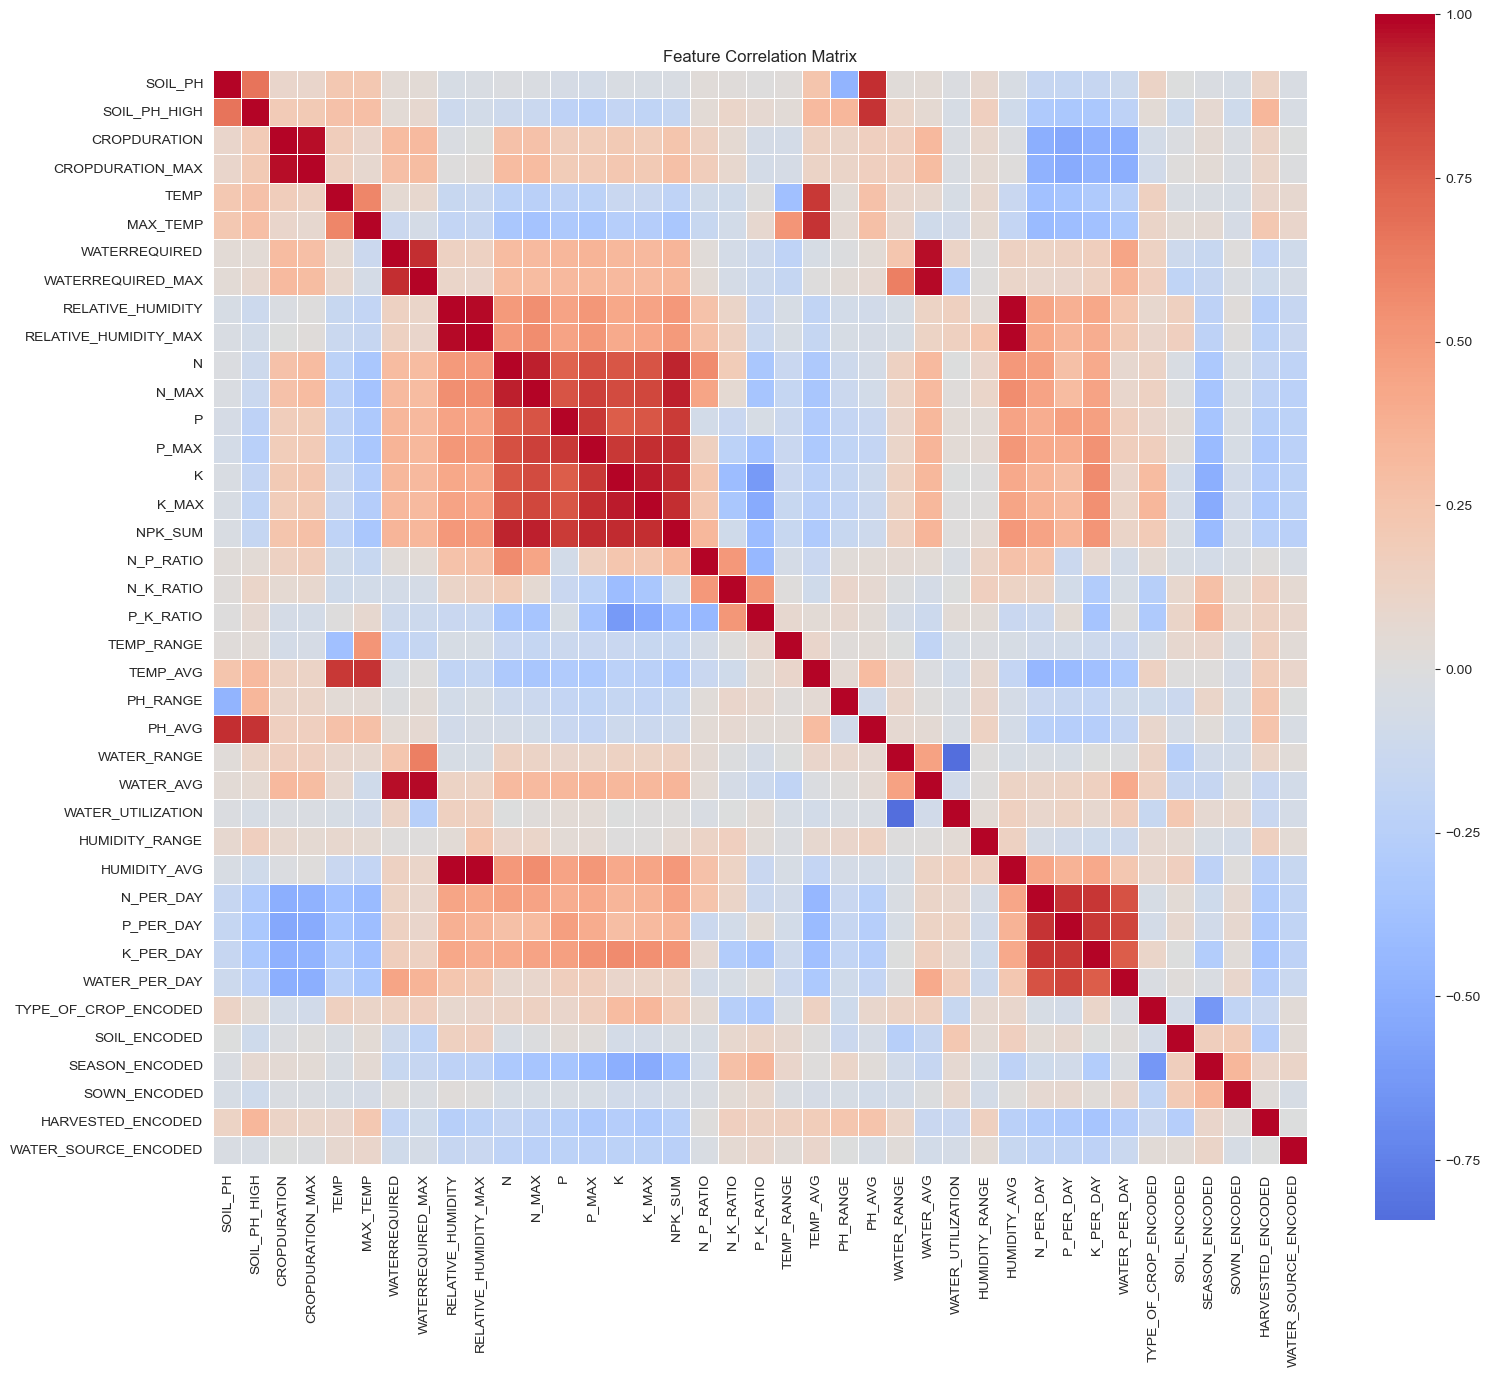


Highly Correlated Feature Pairs (|correlation| > 0.8):
RELATIVE_HUMIDITY_MAX <-> HUMIDITY_AVG: 0.995
RELATIVE_HUMIDITY <-> HUMIDITY_AVG: 0.995
WATERREQUIRED_MAX <-> WATER_AVG: 0.983
RELATIVE_HUMIDITY <-> RELATIVE_HUMIDITY_MAX: 0.979
CROPDURATION <-> CROPDURATION_MAX: 0.978
WATERREQUIRED <-> WATER_AVG: 0.974
K <-> K_MAX: 0.956
N <-> N_MAX: 0.944
N_MAX <-> NPK_SUM: 0.943
N <-> NPK_SUM: 0.940
K <-> NPK_SUM: 0.926
P_MAX <-> NPK_SUM: 0.924
P_MAX <-> K_MAX: 0.920
K_MAX <-> NPK_SUM: 0.920
SOIL_PH <-> PH_AVG: 0.918
WATERREQUIRED <-> WATERREQUIRED_MAX: 0.915
SOIL_PH_HIGH <-> PH_AVG: 0.906
N_PER_DAY <-> P_PER_DAY: 0.902
MAX_TEMP <-> TEMP_AVG: 0.899
N_PER_DAY <-> K_PER_DAY: 0.887
P <-> P_MAX: 0.884
P_MAX <-> K: 0.883
P_PER_DAY <-> K_PER_DAY: 0.883
TEMP <-> TEMP_AVG: 0.880
P <-> NPK_SUM: 0.873
N_MAX <-> P_MAX: 0.862
P_PER_DAY <-> WATER_PER_DAY: 0.847
WATER_RANGE <-> WATER_UTILIZATION: -0.841
N_MAX <-> K_MAX: 0.837
N_MAX <-> K: 0.823
N <-> P_MAX: 0.807


In [ ]:

correlation_matrix = df_encoded[numerical_cols].corr()


plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()


high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print("\nHighly Correlated Feature Pairs (|correlation| > 0.8):")
for feat1, feat2, corr in sorted(high_corr_pairs, key=lambda x: abs(x[2]), reverse=True):
    print(f"{feat1} <-> {feat2}: {corr:.3f}")

In [67]:
df_encoded

,CROPS,TYPE_OF_CROP,SOIL,SEASON,SOWN,HARVESTED,WATER_SOURCE,SOIL_PH,SOIL_PH_HIGH,CROPDURATION,...,N_SQUARED,P_SQUARED,N_P_INTERACTION,TYPE_OF_CROP_ENCODED,SOIL_ENCODED,SEASON_ENCODED,SOWN_ENCODED,HARVESTED_ENCODED,WATER_SOURCE_ENCODED,CROPS_ENCODED
0,rice,cereals,Alluvial soil,kharif,Jun,Sep,irrigated,7.6,8.0,116.9,...,6789.76,1656.49,3353.68,2,0,1,3,6,0,39
1,rice,cereals,Loamy soil,kharif,Jul,Oct,rainfed,6.2,8.0,117.9,...,8190.25,2631.69,4642.65,2,4,1,2,5,1,39
2,rice,cereals,Clay soil,kharif,Jun,Sep,irrigated,6.7,8.0,117.7,...,7430.44,2570.49,4370.34,2,2,1,3,6,0,39
3,rice,cereals,Alluvial soil,kharif,Jul,Oct,rainfed,6.1,8.0,149.8,...,8335.69,2631.69,4683.69,2,0,1,2,5,1,39
4,rice,cereals,Loamy soil,kharif,Jun,Sep,irrigated,8.0,8.0,131.7,...,6609.69,2361.96,3951.18,2,4,1,3,6,0,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,small onion,bulbvegetables,sandy Loamy soil,Zaid,Mar,Mar,rainfed,6.2,7.0,86.6,...,5446.44,1980.25,3284.10,1,24,0,4,3,1,41
56996,small onion,bulbvegetables,sandy Loamy soil,Zaid,Apr,Apr,irrigated,6.4,7.0,70.3,...,5241.76,2550.25,3656.20,1,24,0,0,0,0,41
56997,small onion,bulbvegetables,sandy Loamy soil,Zaid,May,May,rainfed,6.4,7.0,86.3,...,4970.25,3576.04,4215.90,1,24,0,5,4,1,41
56998,small onion,bulbvegetables,sandy Loamy soil,Zaid,Jun,Jun,irrigated,6.2,7.0,89.1,...,4462.24,1616.04,2685.36,1,24,0,3,2,0,41


In [ ]:
'''
output_path = '../Dataset/cleaned_dataset.csv'


df_encoded.to_csv(output_path, index=False)
print(f"Processed dataset saved to: {output_path}")
print(f"Shape: {df_encoded.shape}")
print(f"Columns: {df_encoded.shape[1]}")


numerical_output = df_encoded[numerical_cols + ['CROPS', 'CROPS_ENCODED']]
numerical_output.to_csv('../Dataset/numerical_features.csv', index=False)
print(f"\nNumerical features dataset saved to: ../Dataset/numerical_features.csv")
print(f"Shape: {numerical_output.shape}")
'''

Processed dataset saved to: ../Dataset/cleaned_dataset.csv
Shape: (57000, 56)
Columns: 56

Numerical features dataset saved to: ../Dataset/numerical_features.csv
Shape: (57000, 41)
